# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2020.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           198 non-null    float64
 1   Ln_M_stem_kg_m2       198 non-null    float64
 2   Ln_M_stem_bark_kg_m2  198 non-null    float64
 3   Ln_M_crown_kg_m2      198 non-null    float64
 4   Ln_M_foliage_kg_m2    198 non-null    float64
 5   Ln_M_AG_kg_m2         198 non-null    float64
 6   Ln_Cs_wood            198 non-null    float64
 7   Ln_Sr_wood            198 non-null    float64
 8   Ln_Tag_Cs             198 non-null    float64
 9   Ln_Tag_Sr             198 non-null    float64
 10  r2020B01              198 non-null    float64
 11  r2020B02              198 non-null    float64
 12  r2020B03              198 non-null    float64
 13  r2020B04              198 non-null    float64
 14  r2020B05              198 non-null    float64
 15  r2020B06              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_74701/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            123.0  304.699187  185.582068    2.0  150.5  319.0  457.5   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          123.0  11.991789  7.094609   0.05   6.285  12.37   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.645  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.234646,2.081717,-0.039242,0.171313,-0.953081,2.305758,6.052020,7.395960,-0.566667,2.342424,...,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,1.129652,1.126519,0.789675,0.588506,0.719719,0.931192,2.089707,2.070848,1.250989,0.939283,...,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,4.960000,1.812500,-0.190000,-0.025000,-1.525000,2.052500,4.300000,5.800000,-1.300000,1.700000,...,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,5.510000,2.420000,0.060000,0.310000,-0.690000,2.580000,6.400000,7.600000,-0.500000,2.500000,...,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,5.987500,2.807500,0.387500,0.530000,-0.360000,2.937500,7.400000,8.800000,0.400000,3.000000,...,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


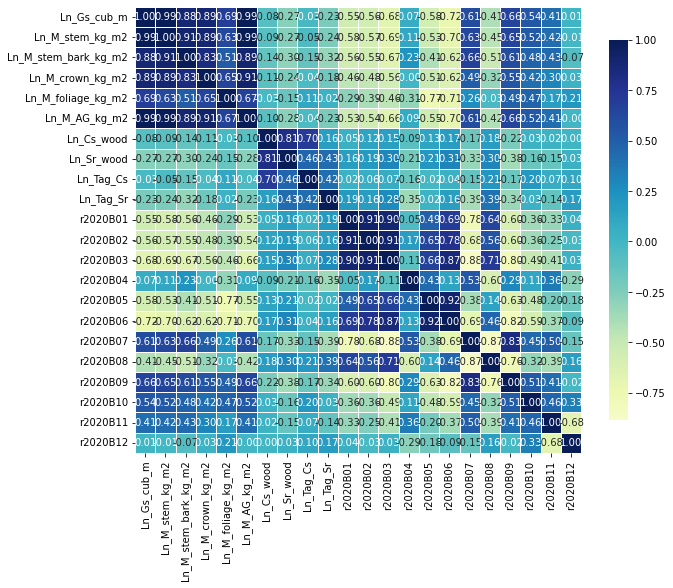

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])
y = pd.DataFrame(select, columns= ['Ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12,Random1,Random2,Random3,Random4,Random5
0,0.019397,0.035344,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806,11.653392,10.416675,12.754549,9.825296,8.975778
1,0.019167,0.033537,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723,9.745103,9.798086,8.712365,8.439709,9.124227
2,0.019568,0.035957,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603,7.393113,10.796862,10.978790,10.295722,11.655846
3,0.020556,0.033868,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609,10.356577,10.399195,10.724437,11.490436,9.493376
4,0.019003,0.036153,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698,10.574727,9.073188,12.404925,8.286666,11.288672


In [11]:
# Columns in "y" data collections
y.head()

,Ln_Tag_Sr
0,2.6
1,2.9
2,2.9
3,2.7
4,2.8


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.3566167731881562, -0.14883119358457142, -0.17323690189343321]
    Mean: -0.226
    Std: 0.093

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.09014481 0.97249758 0.85528128]
    Mean: 0.973
    Std: 0.096

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7232798824594778, 0.7456702998190216, 0.8410422366676908]
    Mean: 0.770
    Std: 0.051

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: -0.009 (std: 0.410)
Parameters: {'colsample_bytree': 0.29186010618710956, 'gamma': 0.07678226885713346, 'learning_rate': 0.042571965528905645, 'max_depth': 2, 'n_estimators': 146, 'subsample': 0.866827954424108}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.17824349, 0.11284513, 0.22683468, 0.15443277, 0.19377913,
       0.12886024, 0.11368184, 0.11305594, 0.15316577, 0.20004616,
       0.24441581, 0.24266496, 0.37854652, 0.37381229, 0.2245544 ,
       0.25368614, 0.12967958, 0.2239305 , 0.31087003, 0.31457644,
       0.2035037 , 0.31920242, 0.24959393, 0.26969452, 0.13470292,
       0.31194096, 0.44716649, 0.20668797, 0.19574051, 0.26043153]), 'std_fit_time': array([0.02016716, 0.00702669, 0.01054875, 0.01105028, 0.01184323,
       0.00897807, 0.00175316, 0.00873341, 0.00328716, 0.0082643 ,
       0.019384  , 0.00226337, 0.0239178 , 0.02905282, 0.00945631,
       0.01282978, 0.00211742, 0.0178809 , 0.00863205, 0.09143587,
       0.11283225, 0.03774688, 0.01885894, 0.00936613, 0.0090446 ,
       0.02777756, 0.09045143, 0.0209594 , 0.0163637 , 0.01717575]), 'mean_score_time': array([0.00796428, 0.00452986, 0.00479569, 0.00457397, 0.00474362,
       0.00463166, 0.00442233, 0.00456772, 0.00456419, 0.00472975,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.29186010618710956
Gamma: 0.07678226885713346
Learning_rate: 0.042571965528905645
Max_depth: 2
N_estimators: 146
Subsample: 0.866827954424108


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.98466	validation_1-rmse:2.04306
[1]	validation_0-rmse:1.91571	validation_1-rmse:1.97648
[2]	validation_0-rmse:1.85087	validation_1-rmse:1.91428
[3]	validation_0-rmse:1.79115	validation_1-rmse:1.86281
[4]	validation_0-rmse:1.73024	validation_1-rmse:1.80384
[5]	validation_0-rmse:1.67399	validation_1-rmse:1.75376
[6]	validation_0-rmse:1.62005	validation_1-rmse:1.70229
[7]	validation_0-rmse:1.57091	validation_1-rmse:1.65663
[8]	validation_0-rmse:1.52446	validation_1-rmse:1.61587
[9]	validation_0-rmse:1.47781	validation_1-rmse:1.57462
[10]	validation_0-rmse:1.43232	validation_1-rmse:1.53293
[11]	validation_0-rmse:1.38723	validation_1-rmse:1.49301
[12]	validation_0-rmse:1.34887	validation_1-rmse:1.45911
[13]	validation_0-rmse:1.30977	validation_1-rmse:1.42499
[14]	validation_0-rmse:1.27318	validation_1-rmse:1.39363
[15]	validation_0-rmse:1.23875	validation_1-rmse:1.36210
[16]	validation_0-rmse:1.20789	validation_1-rmse:1.33505


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.17952	validation_1-rmse:1.31549
[18]	validation_0-rmse:1.15013	validation_1-rmse:1.28976
[19]	validation_0-rmse:1.12158	validation_1-rmse:1.26370
[20]	validation_0-rmse:1.09500	validation_1-rmse:1.23840
[21]	validation_0-rmse:1.07035	validation_1-rmse:1.22024
[22]	validation_0-rmse:1.04922	validation_1-rmse:1.20187
[23]	validation_0-rmse:1.02890	validation_1-rmse:1.18844
[24]	validation_0-rmse:1.00669	validation_1-rmse:1.17385
[25]	validation_0-rmse:0.98894	validation_1-rmse:1.15818
[26]	validation_0-rmse:0.97060	validation_1-rmse:1.14641
[27]	validation_0-rmse:0.95287	validation_1-rmse:1.13212
[28]	validation_0-rmse:0.93628	validation_1-rmse:1.11655
[29]	validation_0-rmse:0.91909	validation_1-rmse:1.10469
[30]	validation_0-rmse:0.90477	validation_1-rmse:1.09603
[31]	validation_0-rmse:0.89010	validation_1-rmse:1.08687
[32]	validation_0-rmse:0.87522	validation_1-rmse:1.07531
[33]	validation_0-rmse:0.86070	validation_1-rmse:1.06725
[34]	validation_0-rmse:0.84830	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.27041	validation_1-rmse:1.30369
[16]	validation_0-rmse:1.24068	validation_1-rmse:1.27262
[17]	validation_0-rmse:1.21238	validation_1-rmse:1.23931
[18]	validation_0-rmse:1.18337	validation_1-rmse:1.21139
[19]	validation_0-rmse:1.15625	validation_1-rmse:1.17969
[20]	validation_0-rmse:1.12915	validation_1-rmse:1.15227
[21]	validation_0-rmse:1.10741	validation_1-rmse:1.13018
[22]	validation_0-rmse:1.08556	validation_1-rmse:1.11063
[23]	validation_0-rmse:1.06370	validation_1-rmse:1.08446
[24]	validation_0-rmse:1.04217	validation_1-rmse:1.06397
[25]	validation_0-rmse:1.02261	validation_1-rmse:1.04799
[26]	validation_0-rmse:1.00631	validation_1-rmse:1.03040
[27]	validation_0-rmse:0.98851	validation_1-rmse:1.00893
[28]	validation_0-rmse:0.97218	validation_1-rmse:0.99054
[29]	validation_0-rmse:0.95588	validation_1-rmse:0.97524
[30]	validation_0-rmse:0.94320	validation_1-rmse:0.96447
[31]	validation_0-rmse:0.92934	validation_1-rmse:0.95273
[32]	validation_0-rmse:0.91630	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.47180	validation_1-rmse:1.60420
[10]	validation_0-rmse:1.42758	validation_1-rmse:1.56245
[11]	validation_0-rmse:1.38861	validation_1-rmse:1.52539
[12]	validation_0-rmse:1.34906	validation_1-rmse:1.49036
[13]	validation_0-rmse:1.31267	validation_1-rmse:1.45821
[14]	validation_0-rmse:1.27868	validation_1-rmse:1.42757
[15]	validation_0-rmse:1.24498	validation_1-rmse:1.39864
[16]	validation_0-rmse:1.21179	validation_1-rmse:1.36681
[17]	validation_0-rmse:1.18274	validation_1-rmse:1.34060
[18]	validation_0-rmse:1.15450	validation_1-rmse:1.31603
[19]	validation_0-rmse:1.12659	validation_1-rmse:1.28921
[20]	validation_0-rmse:1.10043	validation_1-rmse:1.26881
[21]	validation_0-rmse:1.07725	validation_1-rmse:1.25058
[22]	validation_0-rmse:1.05553	validation_1-rmse:1.23167
[23]	validation_0-rmse:1.03348	validation_1-rmse:1.21368
[24]	validation_0-rmse:1.01219	validation_1-rmse:1.19301
[25]	validation_0-rmse:0.99267	validation_1-rmse:1.17620
[26]	validation_0-rmse:0.97678	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.12903	validation_1-rmse:1.14485
[20]	validation_0-rmse:1.10008	validation_1-rmse:1.12949
[21]	validation_0-rmse:1.07515	validation_1-rmse:1.11670
[22]	validation_0-rmse:1.05309	validation_1-rmse:1.10497
[23]	validation_0-rmse:1.03109	validation_1-rmse:1.09078
[24]	validation_0-rmse:1.00817	validation_1-rmse:1.07649
[25]	validation_0-rmse:0.98720	validation_1-rmse:1.06601
[26]	validation_0-rmse:0.96969	validation_1-rmse:1.05798
[27]	validation_0-rmse:0.95069	validation_1-rmse:1.05027
[28]	validation_0-rmse:0.93227	validation_1-rmse:1.04222
[29]	validation_0-rmse:0.91513	validation_1-rmse:1.03462
[30]	validation_0-rmse:0.89969	validation_1-rmse:1.02739
[31]	validation_0-rmse:0.88470	validation_1-rmse:1.02243
[32]	validation_0-rmse:0.87003	validation_1-rmse:1.01696
[33]	validation_0-rmse:0.85660	validation_1-rmse:1.01494
[34]	validation_0-rmse:0.84482	validation_1-rmse:1.01233
[35]	validation_0-rmse:0.83403	validation_1-rmse:1.01208
[36]	validation_0-rmse:0.82302	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.47416	validation_1-rmse:1.61709
[10]	validation_0-rmse:1.42963	validation_1-rmse:1.56928
[11]	validation_0-rmse:1.38712	validation_1-rmse:1.52700
[12]	validation_0-rmse:1.35081	validation_1-rmse:1.48940
[13]	validation_0-rmse:1.31147	validation_1-rmse:1.44770
[14]	validation_0-rmse:1.27694	validation_1-rmse:1.41212
[15]	validation_0-rmse:1.24472	validation_1-rmse:1.38029
[16]	validation_0-rmse:1.21260	validation_1-rmse:1.34664
[17]	validation_0-rmse:1.18535	validation_1-rmse:1.32092
[18]	validation_0-rmse:1.15586	validation_1-rmse:1.29303
[19]	validation_0-rmse:1.12937	validation_1-rmse:1.26764
[20]	validation_0-rmse:1.10572	validation_1-rmse:1.24340
[21]	validation_0-rmse:1.08293	validation_1-rmse:1.22675
[22]	validation_0-rmse:1.06150	validation_1-rmse:1.20488
[23]	validation_0-rmse:1.04174	validation_1-rmse:1.18433
[24]	validation_0-rmse:1.02014	validation_1-rmse:1.16566
[25]	validation_0-rmse:1.00075	validation_1-rmse:1.14514
[26]	validation_0-rmse:0.98362	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.30133	validation_1-rmse:1.54708
[14]	validation_0-rmse:1.26475	validation_1-rmse:1.51440
[15]	validation_0-rmse:1.23412	validation_1-rmse:1.48103
[16]	validation_0-rmse:1.20213	validation_1-rmse:1.44650
[17]	validation_0-rmse:1.17363	validation_1-rmse:1.41694
[18]	validation_0-rmse:1.14529	validation_1-rmse:1.39406
[19]	validation_0-rmse:1.11767	validation_1-rmse:1.36415
[20]	validation_0-rmse:1.09298	validation_1-rmse:1.34102
[21]	validation_0-rmse:1.07028	validation_1-rmse:1.31745
[22]	validation_0-rmse:1.04856	validation_1-rmse:1.29651
[23]	validation_0-rmse:1.02830	validation_1-rmse:1.27310
[24]	validation_0-rmse:1.00595	validation_1-rmse:1.25575
[25]	validation_0-rmse:0.98752	validation_1-rmse:1.23346
[26]	validation_0-rmse:0.97057	validation_1-rmse:1.21761
[27]	validation_0-rmse:0.95216	validation_1-rmse:1.19646
[28]	validation_0-rmse:0.93681	validation_1-rmse:1.18298
[29]	validation_0-rmse:0.91984	validation_1-rmse:1.16781
[30]	validation_0-rmse:0.90724	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.36747	validation_1-rmse:1.37880
[13]	validation_0-rmse:1.32906	validation_1-rmse:1.34614
[14]	validation_0-rmse:1.29142	validation_1-rmse:1.30719
[15]	validation_0-rmse:1.25891	validation_1-rmse:1.27580
[16]	validation_0-rmse:1.22697	validation_1-rmse:1.24941
[17]	validation_0-rmse:1.19973	validation_1-rmse:1.22261
[18]	validation_0-rmse:1.16911	validation_1-rmse:1.19612
[19]	validation_0-rmse:1.14217	validation_1-rmse:1.17515
[20]	validation_0-rmse:1.11642	validation_1-rmse:1.15177
[21]	validation_0-rmse:1.09374	validation_1-rmse:1.13025
[22]	validation_0-rmse:1.07165	validation_1-rmse:1.10799
[23]	validation_0-rmse:1.05048	validation_1-rmse:1.08733
[24]	validation_0-rmse:1.02876	validation_1-rmse:1.06487
[25]	validation_0-rmse:1.00969	validation_1-rmse:1.05153
[26]	validation_0-rmse:0.99248	validation_1-rmse:1.04075
[27]	validation_0-rmse:0.97278	validation_1-rmse:1.02367
[28]	validation_0-rmse:0.95527	validation_1-rmse:1.01149
[29]	validation_0-rmse:0.93926	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.51779	validation_1-rmse:1.68453
[9]	validation_0-rmse:1.47015	validation_1-rmse:1.64128
[10]	validation_0-rmse:1.42562	validation_1-rmse:1.60147
[11]	validation_0-rmse:1.38502	validation_1-rmse:1.56009
[12]	validation_0-rmse:1.34780	validation_1-rmse:1.52755
[13]	validation_0-rmse:1.30938	validation_1-rmse:1.49401
[14]	validation_0-rmse:1.27369	validation_1-rmse:1.46193
[15]	validation_0-rmse:1.24199	validation_1-rmse:1.43206
[16]	validation_0-rmse:1.21044	validation_1-rmse:1.40282
[17]	validation_0-rmse:1.18263	validation_1-rmse:1.37444
[18]	validation_0-rmse:1.15267	validation_1-rmse:1.34646
[19]	validation_0-rmse:1.12521	validation_1-rmse:1.32082
[20]	validation_0-rmse:1.09917	validation_1-rmse:1.29464
[21]	validation_0-rmse:1.07739	validation_1-rmse:1.27603
[22]	validation_0-rmse:1.05554	validation_1-rmse:1.25358
[23]	validation_0-rmse:1.03507	validation_1-rmse:1.23710
[24]	validation_0-rmse:1.01272	validation_1-rmse:1.21913
[25]	validation_0-rmse:0.99295	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.69352	validation_1-rmse:1.65042
[6]	validation_0-rmse:1.63966	validation_1-rmse:1.59988
[7]	validation_0-rmse:1.58933	validation_1-rmse:1.55445
[8]	validation_0-rmse:1.54211	validation_1-rmse:1.51307
[9]	validation_0-rmse:1.49630	validation_1-rmse:1.47064
[10]	validation_0-rmse:1.45066	validation_1-rmse:1.43386
[11]	validation_0-rmse:1.41020	validation_1-rmse:1.39948
[12]	validation_0-rmse:1.37149	validation_1-rmse:1.36747
[13]	validation_0-rmse:1.33399	validation_1-rmse:1.33632
[14]	validation_0-rmse:1.29737	validation_1-rmse:1.30118
[15]	validation_0-rmse:1.26549	validation_1-rmse:1.27075
[16]	validation_0-rmse:1.23184	validation_1-rmse:1.24163
[17]	validation_0-rmse:1.20319	validation_1-rmse:1.21545
[18]	validation_0-rmse:1.17402	validation_1-rmse:1.19462
[19]	validation_0-rmse:1.14699	validation_1-rmse:1.17011
[20]	validation_0-rmse:1.12173	validation_1-rmse:1.15019
[21]	validation_0-rmse:1.09921	validation_1-rmse:1.13088
[22]	validation_0-rmse:1.07557	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.31654	validation_1-rmse:1.66419
[13]	validation_0-rmse:1.27884	validation_1-rmse:1.62739
[14]	validation_0-rmse:1.24398	validation_1-rmse:1.59296
[15]	validation_0-rmse:1.21078	validation_1-rmse:1.55925
[16]	validation_0-rmse:1.18008	validation_1-rmse:1.52739
[17]	validation_0-rmse:1.15138	validation_1-rmse:1.50710
[18]	validation_0-rmse:1.12184	validation_1-rmse:1.48172
[19]	validation_0-rmse:1.09665	validation_1-rmse:1.45233
[20]	validation_0-rmse:1.07028	validation_1-rmse:1.42657
[21]	validation_0-rmse:1.04818	validation_1-rmse:1.40380
[22]	validation_0-rmse:1.02785	validation_1-rmse:1.38465
[23]	validation_0-rmse:1.00620	validation_1-rmse:1.36584
[24]	validation_0-rmse:0.98576	validation_1-rmse:1.34969
[25]	validation_0-rmse:0.96650	validation_1-rmse:1.33338
[26]	validation_0-rmse:0.94927	validation_1-rmse:1.32054
[27]	validation_0-rmse:0.93195	validation_1-rmse:1.30490
[28]	validation_0-rmse:0.91690	validation_1-rmse:1.28978
[29]	validation_0-rmse:0.90016	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.07472	validation_1-rmse:1.06304
[23]	validation_0-rmse:1.05178	validation_1-rmse:1.04434
[24]	validation_0-rmse:1.02872	validation_1-rmse:1.02771
[25]	validation_0-rmse:1.00979	validation_1-rmse:1.01088
[26]	validation_0-rmse:0.99069	validation_1-rmse:0.99812
[27]	validation_0-rmse:0.97088	validation_1-rmse:0.98742
[28]	validation_0-rmse:0.95517	validation_1-rmse:0.97944
[29]	validation_0-rmse:0.93705	validation_1-rmse:0.96903
[30]	validation_0-rmse:0.92256	validation_1-rmse:0.96346
[31]	validation_0-rmse:0.90904	validation_1-rmse:0.95661
[32]	validation_0-rmse:0.89501	validation_1-rmse:0.94702
[33]	validation_0-rmse:0.88272	validation_1-rmse:0.93943
[34]	validation_0-rmse:0.87028	validation_1-rmse:0.93503
[35]	validation_0-rmse:0.85770	validation_1-rmse:0.92519
[36]	validation_0-rmse:0.84734	validation_1-rmse:0.91899
[37]	validation_0-rmse:0.83511	validation_1-rmse:0.91393
[38]	validation_0-rmse:0.82508	validation_1-rmse:0.90943
[39]	validation_0-rmse:0.81536	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.41357	validation_1-rmse:1.34634
[12]	validation_0-rmse:1.37523	validation_1-rmse:1.31430
[13]	validation_0-rmse:1.33785	validation_1-rmse:1.28333
[14]	validation_0-rmse:1.29990	validation_1-rmse:1.25275
[15]	validation_0-rmse:1.26604	validation_1-rmse:1.22792
[16]	validation_0-rmse:1.23529	validation_1-rmse:1.20315
[17]	validation_0-rmse:1.20516	validation_1-rmse:1.18167
[18]	validation_0-rmse:1.17308	validation_1-rmse:1.15382
[19]	validation_0-rmse:1.14425	validation_1-rmse:1.13062
[20]	validation_0-rmse:1.11770	validation_1-rmse:1.10959
[21]	validation_0-rmse:1.09398	validation_1-rmse:1.09018
[22]	validation_0-rmse:1.07278	validation_1-rmse:1.07323
[23]	validation_0-rmse:1.05282	validation_1-rmse:1.05877
[24]	validation_0-rmse:1.02988	validation_1-rmse:1.04040
[25]	validation_0-rmse:1.01016	validation_1-rmse:1.02965
[26]	validation_0-rmse:0.99344	validation_1-rmse:1.02197
[27]	validation_0-rmse:0.97494	validation_1-rmse:1.00716
[28]	validation_0-rmse:0.95841	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.40868	validation_1-rmse:1.43839
[12]	validation_0-rmse:1.36993	validation_1-rmse:1.40335
[13]	validation_0-rmse:1.33109	validation_1-rmse:1.37301
[14]	validation_0-rmse:1.29527	validation_1-rmse:1.34054
[15]	validation_0-rmse:1.26229	validation_1-rmse:1.31459
[16]	validation_0-rmse:1.23081	validation_1-rmse:1.28871
[17]	validation_0-rmse:1.20206	validation_1-rmse:1.26243
[18]	validation_0-rmse:1.17100	validation_1-rmse:1.23777
[19]	validation_0-rmse:1.14296	validation_1-rmse:1.21699
[20]	validation_0-rmse:1.11837	validation_1-rmse:1.19540
[21]	validation_0-rmse:1.09498	validation_1-rmse:1.17482
[22]	validation_0-rmse:1.07327	validation_1-rmse:1.15623
[23]	validation_0-rmse:1.05165	validation_1-rmse:1.13782
[24]	validation_0-rmse:1.02830	validation_1-rmse:1.11683
[25]	validation_0-rmse:1.00907	validation_1-rmse:1.10187
[26]	validation_0-rmse:0.99080	validation_1-rmse:1.08881
[27]	validation_0-rmse:0.97136	validation_1-rmse:1.07407
[28]	validation_0-rmse:0.95425	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.27182	validation_1-rmse:1.39992
[15]	validation_0-rmse:1.23964	validation_1-rmse:1.37388
[16]	validation_0-rmse:1.20705	validation_1-rmse:1.34984
[17]	validation_0-rmse:1.17860	validation_1-rmse:1.32472
[18]	validation_0-rmse:1.14833	validation_1-rmse:1.30304
[19]	validation_0-rmse:1.12111	validation_1-rmse:1.28324
[20]	validation_0-rmse:1.09501	validation_1-rmse:1.26842
[21]	validation_0-rmse:1.07128	validation_1-rmse:1.24912
[22]	validation_0-rmse:1.04974	validation_1-rmse:1.23379
[23]	validation_0-rmse:1.02891	validation_1-rmse:1.22051
[24]	validation_0-rmse:1.00730	validation_1-rmse:1.20369
[25]	validation_0-rmse:0.98719	validation_1-rmse:1.19111
[26]	validation_0-rmse:0.96784	validation_1-rmse:1.18077
[27]	validation_0-rmse:0.94939	validation_1-rmse:1.16984
[28]	validation_0-rmse:0.93192	validation_1-rmse:1.15795
[29]	validation_0-rmse:0.91539	validation_1-rmse:1.14493
[30]	validation_0-rmse:0.90000	validation_1-rmse:1.13685
[31]	validation_0-rmse:0.88400	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.68012	validation_1-rmse:1.71421
[6]	validation_0-rmse:1.62540	validation_1-rmse:1.66457
[7]	validation_0-rmse:1.57532	validation_1-rmse:1.61765
[8]	validation_0-rmse:1.52829	validation_1-rmse:1.57396
[9]	validation_0-rmse:1.47903	validation_1-rmse:1.53386
[10]	validation_0-rmse:1.43366	validation_1-rmse:1.49718
[11]	validation_0-rmse:1.38865	validation_1-rmse:1.45749
[12]	validation_0-rmse:1.35140	validation_1-rmse:1.42393
[13]	validation_0-rmse:1.31214	validation_1-rmse:1.39079
[14]	validation_0-rmse:1.27423	validation_1-rmse:1.36105
[15]	validation_0-rmse:1.24086	validation_1-rmse:1.33285
[16]	validation_0-rmse:1.20741	validation_1-rmse:1.30794
[17]	validation_0-rmse:1.17846	validation_1-rmse:1.28377
[18]	validation_0-rmse:1.14872	validation_1-rmse:1.25716
[19]	validation_0-rmse:1.11973	validation_1-rmse:1.23292
[20]	validation_0-rmse:1.09264	validation_1-rmse:1.21569
[21]	validation_0-rmse:1.06859	validation_1-rmse:1.19908
[22]	validation_0-rmse:1.04613	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.25245	validation_1-rmse:1.32740
[16]	validation_0-rmse:1.22214	validation_1-rmse:1.30198
[17]	validation_0-rmse:1.19319	validation_1-rmse:1.27547
[18]	validation_0-rmse:1.16425	validation_1-rmse:1.24814
[19]	validation_0-rmse:1.13724	validation_1-rmse:1.22296
[20]	validation_0-rmse:1.11175	validation_1-rmse:1.20187
[21]	validation_0-rmse:1.08934	validation_1-rmse:1.18149
[22]	validation_0-rmse:1.06723	validation_1-rmse:1.16452
[23]	validation_0-rmse:1.04569	validation_1-rmse:1.14679
[24]	validation_0-rmse:1.02287	validation_1-rmse:1.13137
[25]	validation_0-rmse:1.00381	validation_1-rmse:1.11496
[26]	validation_0-rmse:0.98813	validation_1-rmse:1.10114
[27]	validation_0-rmse:0.97037	validation_1-rmse:1.08744
[28]	validation_0-rmse:0.95326	validation_1-rmse:1.07222
[29]	validation_0-rmse:0.93783	validation_1-rmse:1.05884
[30]	validation_0-rmse:0.92456	validation_1-rmse:1.04803
[31]	validation_0-rmse:0.90928	validation_1-rmse:1.03182
[32]	validation_0-rmse:0.89671	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.62641	validation_1-rmse:1.68904
[7]	validation_0-rmse:1.57923	validation_1-rmse:1.64207
[8]	validation_0-rmse:1.53199	validation_1-rmse:1.59318
[9]	validation_0-rmse:1.48388	validation_1-rmse:1.54393
[10]	validation_0-rmse:1.43974	validation_1-rmse:1.49621
[11]	validation_0-rmse:1.39847	validation_1-rmse:1.45453
[12]	validation_0-rmse:1.36265	validation_1-rmse:1.41835
[13]	validation_0-rmse:1.32604	validation_1-rmse:1.38152
[14]	validation_0-rmse:1.29115	validation_1-rmse:1.34519
[15]	validation_0-rmse:1.25909	validation_1-rmse:1.31691
[16]	validation_0-rmse:1.22650	validation_1-rmse:1.28302
[17]	validation_0-rmse:1.19711	validation_1-rmse:1.25400
[18]	validation_0-rmse:1.16756	validation_1-rmse:1.22588
[19]	validation_0-rmse:1.14072	validation_1-rmse:1.19935
[20]	validation_0-rmse:1.11505	validation_1-rmse:1.17442
[21]	validation_0-rmse:1.09346	validation_1-rmse:1.15577
[22]	validation_0-rmse:1.07195	validation_1-rmse:1.13573
[23]	validation_0-rmse:1.05343	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.28292	validation_1-rmse:1.07801
[16]	validation_0-rmse:1.25137	validation_1-rmse:1.05611
[17]	validation_0-rmse:1.22300	validation_1-rmse:1.03681
[18]	validation_0-rmse:1.19250	validation_1-rmse:1.01675
[19]	validation_0-rmse:1.16296	validation_1-rmse:1.00121
[20]	validation_0-rmse:1.13427	validation_1-rmse:0.98486
[21]	validation_0-rmse:1.10982	validation_1-rmse:0.96845
[22]	validation_0-rmse:1.08561	validation_1-rmse:0.95626
[23]	validation_0-rmse:1.06351	validation_1-rmse:0.94344
[24]	validation_0-rmse:1.04120	validation_1-rmse:0.92672
[25]	validation_0-rmse:1.02175	validation_1-rmse:0.91555
[26]	validation_0-rmse:1.00364	validation_1-rmse:0.90977
[27]	validation_0-rmse:0.98428	validation_1-rmse:0.90141
[28]	validation_0-rmse:0.96619	validation_1-rmse:0.89650
[29]	validation_0-rmse:0.94898	validation_1-rmse:0.88855
[30]	validation_0-rmse:0.93322	validation_1-rmse:0.87878
[31]	validation_0-rmse:0.91972	validation_1-rmse:0.87305
[32]	validation_0-rmse:0.90625	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.35847	validation_1-rmse:1.38897
[13]	validation_0-rmse:1.32094	validation_1-rmse:1.35307
[14]	validation_0-rmse:1.28373	validation_1-rmse:1.31803
[15]	validation_0-rmse:1.25012	validation_1-rmse:1.28737
[16]	validation_0-rmse:1.22012	validation_1-rmse:1.26082
[17]	validation_0-rmse:1.19162	validation_1-rmse:1.23612
[18]	validation_0-rmse:1.16133	validation_1-rmse:1.21184
[19]	validation_0-rmse:1.13499	validation_1-rmse:1.18834
[20]	validation_0-rmse:1.10746	validation_1-rmse:1.16865
[21]	validation_0-rmse:1.08488	validation_1-rmse:1.14907
[22]	validation_0-rmse:1.06318	validation_1-rmse:1.13107
[23]	validation_0-rmse:1.04263	validation_1-rmse:1.11233
[24]	validation_0-rmse:1.01941	validation_1-rmse:1.09149
[25]	validation_0-rmse:1.00019	validation_1-rmse:1.07878
[26]	validation_0-rmse:0.98221	validation_1-rmse:1.06603
[27]	validation_0-rmse:0.96461	validation_1-rmse:1.05083
[28]	validation_0-rmse:0.94822	validation_1-rmse:1.03907
[29]	validation_0-rmse:0.92981	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.40443	validation_1-rmse:1.38797
[12]	validation_0-rmse:1.36424	validation_1-rmse:1.35408
[13]	validation_0-rmse:1.32506	validation_1-rmse:1.32104
[14]	validation_0-rmse:1.28816	validation_1-rmse:1.29360
[15]	validation_0-rmse:1.25625	validation_1-rmse:1.26697
[16]	validation_0-rmse:1.22381	validation_1-rmse:1.24143
[17]	validation_0-rmse:1.19373	validation_1-rmse:1.21670
[18]	validation_0-rmse:1.16196	validation_1-rmse:1.19238
[19]	validation_0-rmse:1.13329	validation_1-rmse:1.17267
[20]	validation_0-rmse:1.10696	validation_1-rmse:1.15542
[21]	validation_0-rmse:1.08465	validation_1-rmse:1.14203
[22]	validation_0-rmse:1.06101	validation_1-rmse:1.12829
[23]	validation_0-rmse:1.03963	validation_1-rmse:1.11327
[24]	validation_0-rmse:1.01698	validation_1-rmse:1.09747
[25]	validation_0-rmse:0.99802	validation_1-rmse:1.08190
[26]	validation_0-rmse:0.97977	validation_1-rmse:1.06937
[27]	validation_0-rmse:0.96094	validation_1-rmse:1.05754
[28]	validation_0-rmse:0.94360	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.64410	validation_1-rmse:1.55841
[7]	validation_0-rmse:1.59433	validation_1-rmse:1.50972
[8]	validation_0-rmse:1.54666	validation_1-rmse:1.46630
[9]	validation_0-rmse:1.50083	validation_1-rmse:1.42214
[10]	validation_0-rmse:1.45483	validation_1-rmse:1.37855
[11]	validation_0-rmse:1.41414	validation_1-rmse:1.33745
[12]	validation_0-rmse:1.37352	validation_1-rmse:1.30280
[13]	validation_0-rmse:1.33539	validation_1-rmse:1.26710
[14]	validation_0-rmse:1.29853	validation_1-rmse:1.23360
[15]	validation_0-rmse:1.26511	validation_1-rmse:1.20355
[16]	validation_0-rmse:1.23291	validation_1-rmse:1.17331
[17]	validation_0-rmse:1.20251	validation_1-rmse:1.15505
[18]	validation_0-rmse:1.17339	validation_1-rmse:1.12716
[19]	validation_0-rmse:1.14579	validation_1-rmse:1.10281
[20]	validation_0-rmse:1.12137	validation_1-rmse:1.07989
[21]	validation_0-rmse:1.09803	validation_1-rmse:1.05812
[22]	validation_0-rmse:1.07532	validation_1-rmse:1.04221
[23]	validation_0-rmse:1.05367	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.58433	validation_1-rmse:1.59273
[8]	validation_0-rmse:1.53821	validation_1-rmse:1.54828
[9]	validation_0-rmse:1.49342	validation_1-rmse:1.50123
[10]	validation_0-rmse:1.44763	validation_1-rmse:1.46056
[11]	validation_0-rmse:1.40510	validation_1-rmse:1.41816
[12]	validation_0-rmse:1.36694	validation_1-rmse:1.37953
[13]	validation_0-rmse:1.32768	validation_1-rmse:1.34478
[14]	validation_0-rmse:1.29089	validation_1-rmse:1.30756
[15]	validation_0-rmse:1.25862	validation_1-rmse:1.27585
[16]	validation_0-rmse:1.22829	validation_1-rmse:1.24594
[17]	validation_0-rmse:1.19974	validation_1-rmse:1.21852
[18]	validation_0-rmse:1.17023	validation_1-rmse:1.19173
[19]	validation_0-rmse:1.14482	validation_1-rmse:1.16650
[20]	validation_0-rmse:1.12038	validation_1-rmse:1.14512
[21]	validation_0-rmse:1.09756	validation_1-rmse:1.12143
[22]	validation_0-rmse:1.07553	validation_1-rmse:1.10394
[23]	validation_0-rmse:1.05379	validation_1-rmse:1.08547
[24]	validation_0-rmse:1.03237	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.35338	validation_1-rmse:1.13928
[14]	validation_0-rmse:1.31722	validation_1-rmse:1.10179
[15]	validation_0-rmse:1.28433	validation_1-rmse:1.07260
[16]	validation_0-rmse:1.25114	validation_1-rmse:1.04082
[17]	validation_0-rmse:1.22090	validation_1-rmse:1.01051
[18]	validation_0-rmse:1.19012	validation_1-rmse:0.98569
[19]	validation_0-rmse:1.16239	validation_1-rmse:0.95936
[20]	validation_0-rmse:1.13637	validation_1-rmse:0.93680
[21]	validation_0-rmse:1.11302	validation_1-rmse:0.91761
[22]	validation_0-rmse:1.08932	validation_1-rmse:0.90504
[23]	validation_0-rmse:1.06748	validation_1-rmse:0.89025
[24]	validation_0-rmse:1.04441	validation_1-rmse:0.87490
[25]	validation_0-rmse:1.02457	validation_1-rmse:0.86020
[26]	validation_0-rmse:1.00779	validation_1-rmse:0.85060
[27]	validation_0-rmse:0.98771	validation_1-rmse:0.83920
[28]	validation_0-rmse:0.97042	validation_1-rmse:0.82642
[29]	validation_0-rmse:0.95430	validation_1-rmse:0.81444
[30]	validation_0-rmse:0.93920	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.41601	validation_1-rmse:1.33495
[12]	validation_0-rmse:1.37487	validation_1-rmse:1.29640
[13]	validation_0-rmse:1.33582	validation_1-rmse:1.26132
[14]	validation_0-rmse:1.29839	validation_1-rmse:1.23137
[15]	validation_0-rmse:1.26564	validation_1-rmse:1.20276
[16]	validation_0-rmse:1.23393	validation_1-rmse:1.17439
[17]	validation_0-rmse:1.20475	validation_1-rmse:1.14629
[18]	validation_0-rmse:1.17523	validation_1-rmse:1.12130
[19]	validation_0-rmse:1.14827	validation_1-rmse:1.09784
[20]	validation_0-rmse:1.12345	validation_1-rmse:1.07682
[21]	validation_0-rmse:1.10095	validation_1-rmse:1.05774
[22]	validation_0-rmse:1.07678	validation_1-rmse:1.04067
[23]	validation_0-rmse:1.05508	validation_1-rmse:1.02473
[24]	validation_0-rmse:1.03101	validation_1-rmse:1.00925
[25]	validation_0-rmse:1.01047	validation_1-rmse:0.99240
[26]	validation_0-rmse:0.99356	validation_1-rmse:0.97969
[27]	validation_0-rmse:0.97397	validation_1-rmse:0.96266
[28]	validation_0-rmse:0.95669	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.59754	validation_1-rmse:1.82611
[7]	validation_0-rmse:1.55214	validation_1-rmse:1.77877
[8]	validation_0-rmse:1.50710	validation_1-rmse:1.73602
[9]	validation_0-rmse:1.46317	validation_1-rmse:1.69042
[10]	validation_0-rmse:1.42091	validation_1-rmse:1.64802
[11]	validation_0-rmse:1.37942	validation_1-rmse:1.60600
[12]	validation_0-rmse:1.34048	validation_1-rmse:1.56798
[13]	validation_0-rmse:1.30502	validation_1-rmse:1.53468
[14]	validation_0-rmse:1.27118	validation_1-rmse:1.49773
[15]	validation_0-rmse:1.23917	validation_1-rmse:1.46721
[16]	validation_0-rmse:1.20869	validation_1-rmse:1.43230
[17]	validation_0-rmse:1.17947	validation_1-rmse:1.40156
[18]	validation_0-rmse:1.15083	validation_1-rmse:1.37205
[19]	validation_0-rmse:1.12333	validation_1-rmse:1.34213
[20]	validation_0-rmse:1.09993	validation_1-rmse:1.31765
[21]	validation_0-rmse:1.07895	validation_1-rmse:1.29547
[22]	validation_0-rmse:1.05853	validation_1-rmse:1.27590
[23]	validation_0-rmse:1.03923	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.29307	validation_1-rmse:1.32467
[15]	validation_0-rmse:1.26134	validation_1-rmse:1.29682
[16]	validation_0-rmse:1.22934	validation_1-rmse:1.27084
[17]	validation_0-rmse:1.19902	validation_1-rmse:1.24826
[18]	validation_0-rmse:1.16879	validation_1-rmse:1.21862
[19]	validation_0-rmse:1.14105	validation_1-rmse:1.19225
[20]	validation_0-rmse:1.11268	validation_1-rmse:1.16817
[21]	validation_0-rmse:1.08956	validation_1-rmse:1.14840
[22]	validation_0-rmse:1.06785	validation_1-rmse:1.13050
[23]	validation_0-rmse:1.04501	validation_1-rmse:1.11199
[24]	validation_0-rmse:1.02330	validation_1-rmse:1.09644
[25]	validation_0-rmse:1.00217	validation_1-rmse:1.07629
[26]	validation_0-rmse:0.98306	validation_1-rmse:1.06251
[27]	validation_0-rmse:0.96362	validation_1-rmse:1.04606
[28]	validation_0-rmse:0.94623	validation_1-rmse:1.03237
[29]	validation_0-rmse:0.92925	validation_1-rmse:1.01944
[30]	validation_0-rmse:0.91433	validation_1-rmse:1.00456
[31]	validation_0-rmse:0.89979	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.86363	validation_1-rmse:0.99734
[35]	validation_0-rmse:0.85229	validation_1-rmse:0.98718
[36]	validation_0-rmse:0.84174	validation_1-rmse:0.97745
[37]	validation_0-rmse:0.83199	validation_1-rmse:0.96842
[38]	validation_0-rmse:0.82369	validation_1-rmse:0.96021
[39]	validation_0-rmse:0.81419	validation_1-rmse:0.95199
[40]	validation_0-rmse:0.80561	validation_1-rmse:0.94333
[41]	validation_0-rmse:0.79980	validation_1-rmse:0.93760
[42]	validation_0-rmse:0.79296	validation_1-rmse:0.93206
[43]	validation_0-rmse:0.78545	validation_1-rmse:0.92657
[44]	validation_0-rmse:0.77790	validation_1-rmse:0.92253
[45]	validation_0-rmse:0.77194	validation_1-rmse:0.91662
[46]	validation_0-rmse:0.76574	validation_1-rmse:0.91150
[47]	validation_0-rmse:0.75934	validation_1-rmse:0.90697
[48]	validation_0-rmse:0.75401	validation_1-rmse:0.90291
[49]	validation_0-rmse:0.74931	validation_1-rmse:0.89943
[50]	validation_0-rmse:0.74441	validation_1-rmse:0.89563
[51]	validation_0-rmse:0.74009	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.97207	validation_1-rmse:1.19623
[27]	validation_0-rmse:0.95554	validation_1-rmse:1.17726
[28]	validation_0-rmse:0.93842	validation_1-rmse:1.16313
[29]	validation_0-rmse:0.92264	validation_1-rmse:1.14702
[30]	validation_0-rmse:0.91031	validation_1-rmse:1.13414
[31]	validation_0-rmse:0.89637	validation_1-rmse:1.12000
[32]	validation_0-rmse:0.88305	validation_1-rmse:1.10782
[33]	validation_0-rmse:0.87053	validation_1-rmse:1.09352
[34]	validation_0-rmse:0.85835	validation_1-rmse:1.07960
[35]	validation_0-rmse:0.84663	validation_1-rmse:1.06351
[36]	validation_0-rmse:0.83529	validation_1-rmse:1.05293
[37]	validation_0-rmse:0.82623	validation_1-rmse:1.04553
[38]	validation_0-rmse:0.81669	validation_1-rmse:1.03518
[39]	validation_0-rmse:0.80884	validation_1-rmse:1.02260
[40]	validation_0-rmse:0.80001	validation_1-rmse:1.01425
[41]	validation_0-rmse:0.79263	validation_1-rmse:1.00999
[42]	validation_0-rmse:0.78661	validation_1-rmse:0.99940
[43]	validation_0-rmse:0.77937	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.96769	validation_1-rmse:1.09730
[27]	validation_0-rmse:0.94766	validation_1-rmse:1.09092
[28]	validation_0-rmse:0.92929	validation_1-rmse:1.08101
[29]	validation_0-rmse:0.91111	validation_1-rmse:1.07136
[30]	validation_0-rmse:0.89664	validation_1-rmse:1.06665
[31]	validation_0-rmse:0.88179	validation_1-rmse:1.06317
[32]	validation_0-rmse:0.86947	validation_1-rmse:1.05992
[33]	validation_0-rmse:0.85714	validation_1-rmse:1.05394
[34]	validation_0-rmse:0.84549	validation_1-rmse:1.04750
[35]	validation_0-rmse:0.83379	validation_1-rmse:1.04433
[36]	validation_0-rmse:0.82262	validation_1-rmse:1.04215
[37]	validation_0-rmse:0.81297	validation_1-rmse:1.03639
[38]	validation_0-rmse:0.80275	validation_1-rmse:1.03364
[39]	validation_0-rmse:0.79361	validation_1-rmse:1.03131
[40]	validation_0-rmse:0.78348	validation_1-rmse:1.02991
[41]	validation_0-rmse:0.77537	validation_1-rmse:1.03231
[42]	validation_0-rmse:0.76769	validation_1-rmse:1.02947
[43]	validation_0-rmse:0.76048	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.86737	validation_1-rmse:0.96989
[34]	validation_0-rmse:0.85448	validation_1-rmse:0.96640
[35]	validation_0-rmse:0.84266	validation_1-rmse:0.96158
[36]	validation_0-rmse:0.83006	validation_1-rmse:0.95847
[37]	validation_0-rmse:0.81906	validation_1-rmse:0.95800
[38]	validation_0-rmse:0.80828	validation_1-rmse:0.95668
[39]	validation_0-rmse:0.79925	validation_1-rmse:0.95465
[40]	validation_0-rmse:0.79110	validation_1-rmse:0.94895
[41]	validation_0-rmse:0.78301	validation_1-rmse:0.94539
[42]	validation_0-rmse:0.77487	validation_1-rmse:0.94323
[43]	validation_0-rmse:0.76817	validation_1-rmse:0.93908
[44]	validation_0-rmse:0.76170	validation_1-rmse:0.93961
[45]	validation_0-rmse:0.75507	validation_1-rmse:0.93637
[46]	validation_0-rmse:0.74746	validation_1-rmse:0.93360
[47]	validation_0-rmse:0.74157	validation_1-rmse:0.93014
[48]	validation_0-rmse:0.73562	validation_1-rmse:0.92978
[49]	validation_0-rmse:0.73043	validation_1-rmse:0.93100
[50]	validation_0-rmse:0.72595	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 99.3, median: 96.0,
 pred. interval (P(0.025)-P(0.975)): 39.725-145.0, 
 conf. interval (p-value=0.95): 90.574-108.561 
***
Aggregate bias statistic: 
 mean: -3.124, median: -2.752,
 pred. interval (P(0.025)-P(0.975)): -15.646-6.835, 
 conf. interval (p-value=0.95): -4.14--1.366 
***
Aggregate RMSE statistic: 
 mean: 0.879, median: 0.873, pred. interval (P(0.025)-P(0.975)): 0.752-1.017, 
 conf. interval (p-value=0.95): 0.854-0.894 
***
Aggregate MSE statistic: 
 mean: 0.778, median: 0.762, pred. interval (P(0.025)-P(0.975)): 0.566-1.034, 
 conf. interval (p-value=0.95): 0.729-0.801 
***
Aggregate R^2 statistic: 
 mean: 0.103, median: 0.12, pred. interval (P(0.025)-P(0.975)): -0.083-0.282, 
 conf. interval (p-value=0.95): 0.081-0.141 
***
Aggregate bias(%) statistic: 
 mean: -1.229, median: -2.752, pred. interval (P(0.025)-P(0.975)): -6.126-3.172, 
 conf. interval (p-value=0.95): -1.701--0.559 
***
Aggregate RMSE(%) statistic: 
 

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.99563
[1]	validation_0-rmse:1.92579
[2]	validation_0-rmse:1.86279


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.79994
[4]	validation_0-rmse:1.73922
[5]	validation_0-rmse:1.68349
[6]	validation_0-rmse:1.62942
[7]	validation_0-rmse:1.57694
[8]	validation_0-rmse:1.52981
[9]	validation_0-rmse:1.48576
[10]	validation_0-rmse:1.44408
[11]	validation_0-rmse:1.40316
[12]	validation_0-rmse:1.36379
[13]	validation_0-rmse:1.32759
[14]	validation_0-rmse:1.29318
[15]	validation_0-rmse:1.25897
[16]	validation_0-rmse:1.22592
[17]	validation_0-rmse:1.19726
[18]	validation_0-rmse:1.16869
[19]	validation_0-rmse:1.14160
[20]	validation_0-rmse:1.11729
[21]	validation_0-rmse:1.09259
[22]	validation_0-rmse:1.06939
[23]	validation_0-rmse:1.04740
[24]	validation_0-rmse:1.02833
[25]	validation_0-rmse:1.01092
[26]	validation_0-rmse:0.99140
[27]	validation_0-rmse:0.97385
[28]	validation_0-rmse:0.95723
[29]	validation_0-rmse:0.94154
[30]	validation_0-rmse:0.92729
[31]	validation_0-rmse:0.91446
[32]	validation_0-rmse:0.90072
[33]	validation_0-rmse:0.88869
[34]	validation_0-rmse:0.87608
[35]	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 145


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

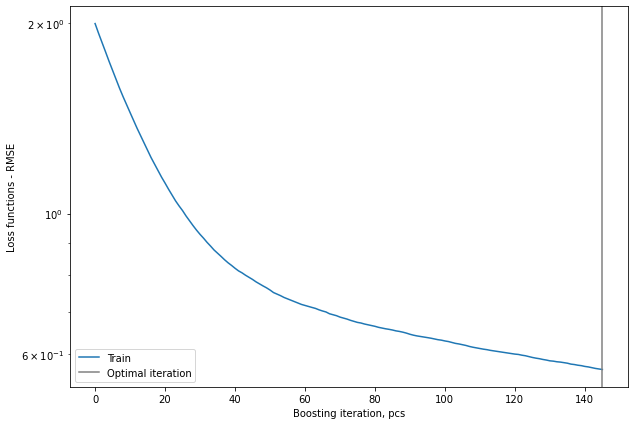

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.12
RMSE: 0.6
Relative RMSE(%):  0.242
MSE: 0.3
R square: 63.3%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.227
a1: 0.476
R^2: 0.712
Uncertainty
a0: 1.23+/-0.05
a1: 0.476+/-0.022


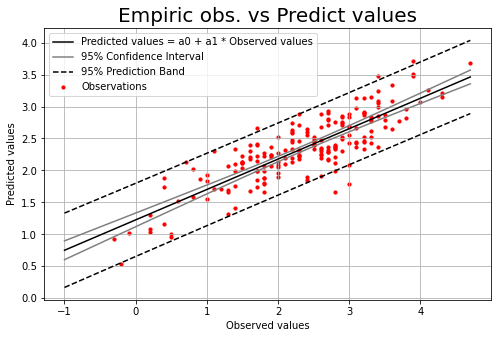

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

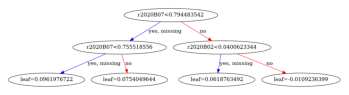

In [34]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

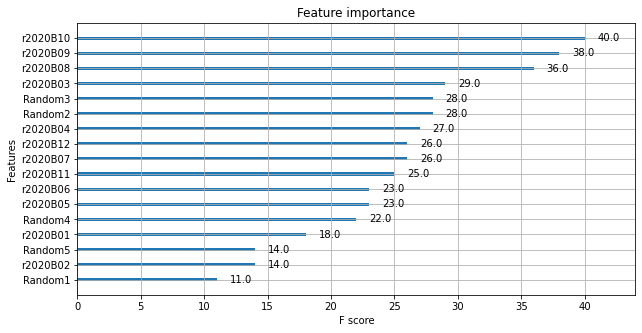

In [36]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

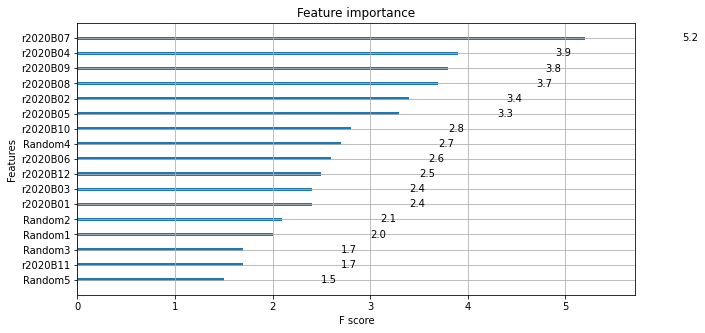

In [37]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

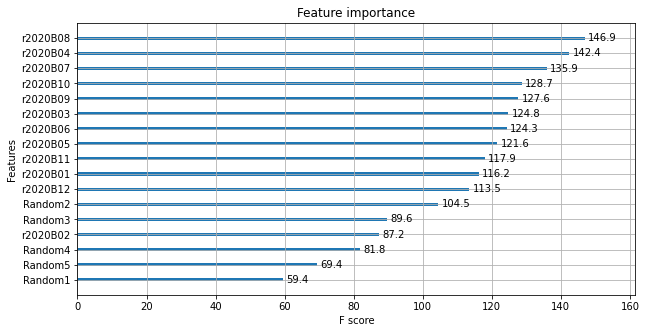

In [38]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [39]:
# Load SHAP`s library
import shap

In [40]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


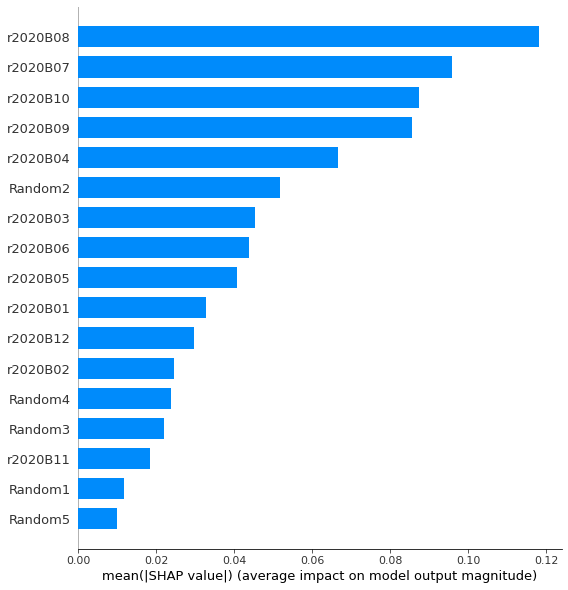

In [41]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

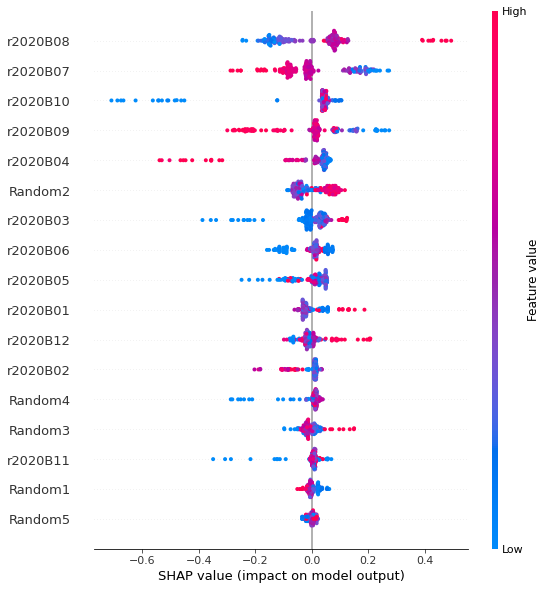

In [42]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

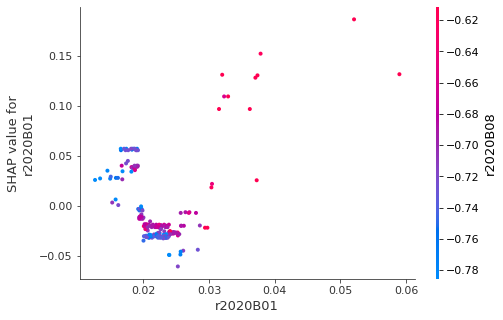

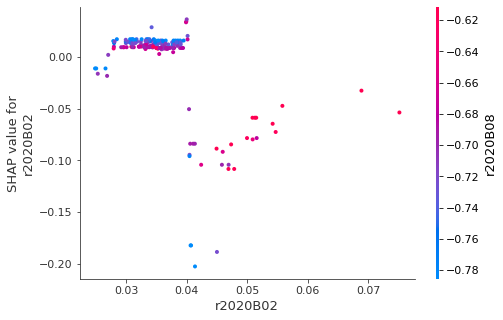

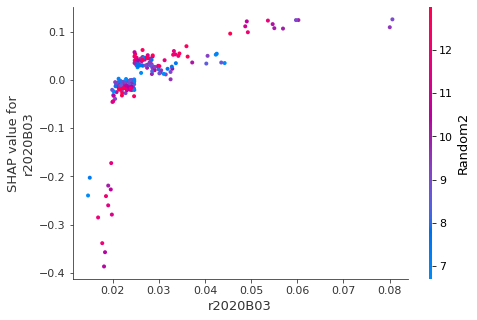

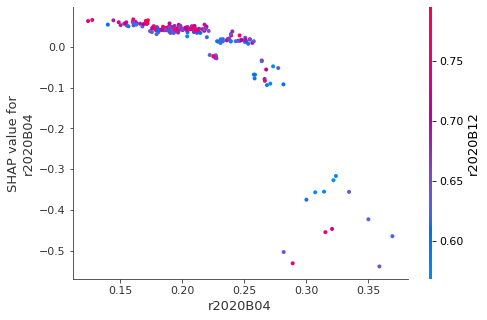

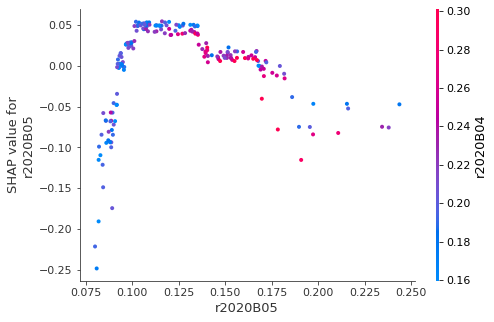

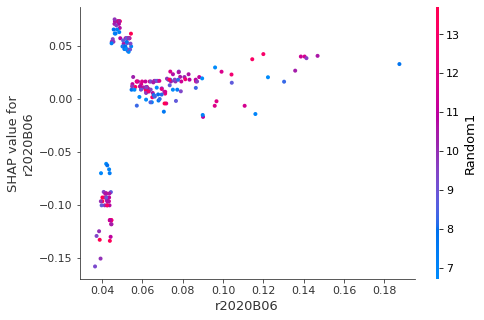

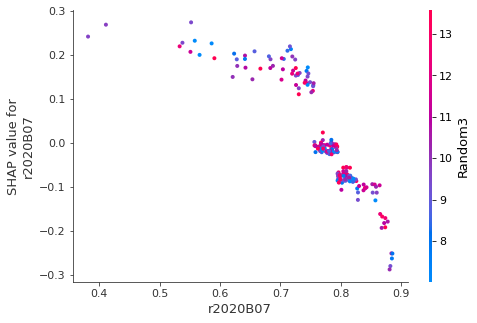

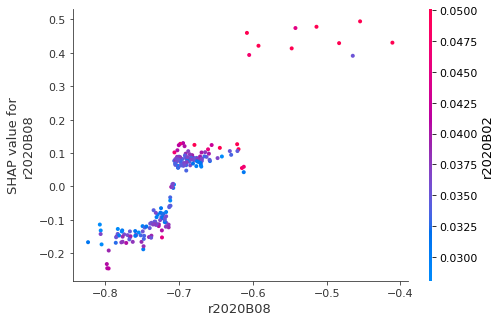

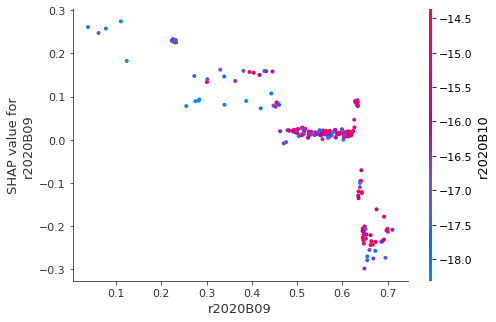

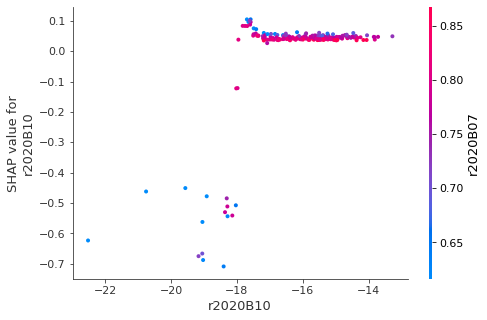

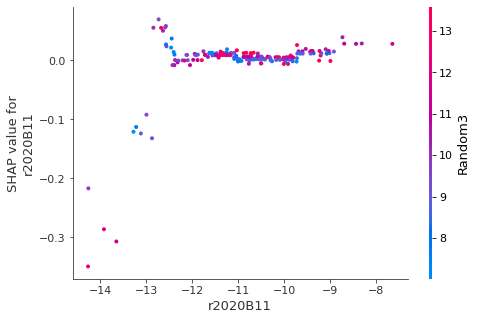

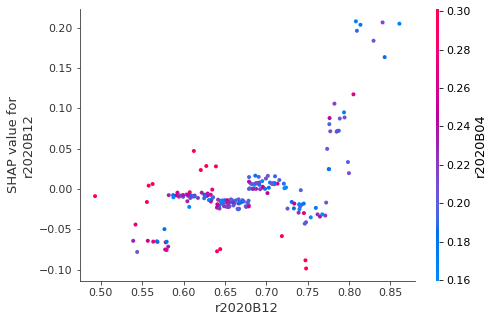

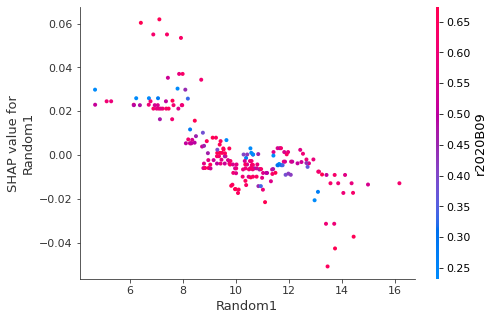

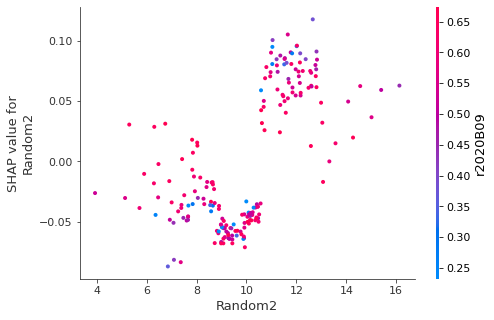

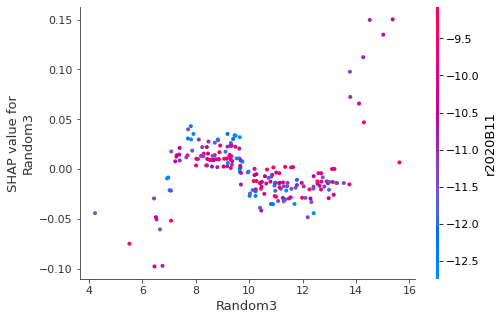

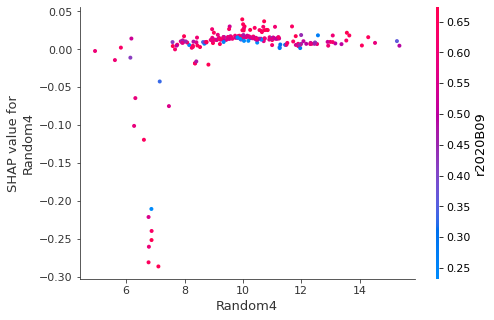

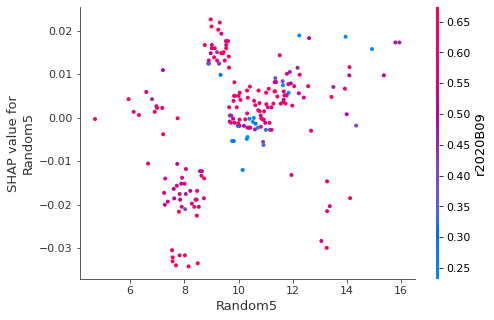

In [43]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Nootbooks/.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Nootbooks/.txt")